# The Fitness Level Predictor - by Kenneth Xavier Dsilva ID:10600644
### The Dataset is taken from Kaggle https://www.kaggle.com/datasets/nithilaa/fitness-analysis

Acknowledgements:
This dataset wouldn't be here without the help of my friends. So, thanks to them!



# PART 1

##Imports and Data Loading

In [ ]:
import pandas as pd
import numpy as np
from numpy import mean, std
from math import sqrt
from statistics import median, mode, variance,stdev
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score
from sklearn.naive_bayes import  GaussianNB 
from sklearn.linear_model import  LogisticRegression 
from sklearn import svm
from sklearn import linear_model
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.ensemble import BaggingClassifier,StackingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA


## Data Loading
Note: Please upload the fitness analysis.csv to this Colab Notebook.

In [ ]:
df = pd.read_csv("/content/fitness analysis.csv")
df.head()

,Timestamp,Your name,Your gender,Your age,How important is exercise to you ?,How do you describe your current level of fitness ?,How often do you exercise?,"What barriers, if any, prevent you from exercising more regularly? (Please select all that apply)",What form(s) of exercise do you currently participate in ? (Please select all that apply),Do you exercise ___________ ?,What time if the day do you prefer to exercise?,How long do you spend exercising per day ?,Would you say you eat a healthy balanced diet ?,"What prevents you from eating a healthy balanced diet, If any? (Please select all that apply)",How healthy do you consider yourself?,Have you ever recommended your friends to follow a fitness routine?,Have you ever purchased a fitness equipment?,What motivates you to exercise? (Please select all that applies )
0,2019/07/03 11:48:07 PM GMT+5:30,Parkavi,Female,19 to 25,2,Good,Never,I don't have enough time;I can't stay motivated,I don't really exercise,I don't really exercise,Early morning,I don't really exercise,Not always,Ease of access to fast food;Temptation and cra...,3,Yes,No,I'm sorry ... I'm not really interested in exe...
1,2019/07/03 11:51:22 PM GMT+5:30,Nithilaa,Female,19 to 25,4,Very good,Never,I don't have enough time;I'll become too tired,Walking or jogging;Swimming,With a group,Early morning,I don't really exercise,Not always,Ease of access to fast food;Temptation and cra...,4,Yes,No,I want to be fit;I want to be flexible;I want ...
2,2019/07/03 11:56:28 PM GMT+5:30,Karunya v,Female,15 to 18,3,Good,1 to 2 times a week,I can't stay motivated,Walking or jogging,Alone,Early morning,30 minutes,Not always,Temptation and cravings,4,Yes,Yes,I want to be fit
3,2019/07/04 5:43:35 AM GMT+5:30,Anusha,Female,15 to 18,4,Good,3 to 4 times a week,I don't have enough time,Walking or jogging;Gym;Lifting weights,Alone,Evening,1 hour,Yes,Temptation and cravings,4,Yes,No,I want to be fit;I want to lose weight
4,2019/07/04 5:44:29 AM GMT+5:30,Nikkitha,Female,19 to 25,3,Unfit,Never,I can't stay motivated,I don't really exercise,I don't really exercise,Evening,I don't really exercise,Yes,Ease of access to fast food;Temptation and cra...,4,Yes,No,I want to be fit


##Dropping irrelevant data.

We Are Dropping:


1.   **Timestamp**: This Survey isint depended on a Time Series
2.   **Sex**: Irrelavant for fitness analysis
1.   **Names**: Irrelavant 
1.   **Barriers/Excuses for not Exercising**: Insignificant as Hours of Exercise and How Often do you Exercise overshadows this column.
2.**Do you exercise ___________ ?**: Exercising Alone, with a group or with a partner effects the mental state not the physical outcome for our current analysis
1.**Time of the day**: Irrelevant as hours spent in exercise is more important than time of the day of the exercise
2.**Reason for not having a healthy Diet and lastly motivation.**: Irrelevant 




In [ ]:
cols = [0,1,2,7,9,10,13,17]
df.drop(df.columns[cols],axis=1,inplace=True)

df.head()

,Your age,How important is exercise to you ?,How do you describe your current level of fitness ?,How often do you exercise?,What form(s) of exercise do you currently participate in ? (Please select all that apply),How long do you spend exercising per day ?,Would you say you eat a healthy balanced diet ?,How healthy do you consider yourself?,Have you ever recommended your friends to follow a fitness routine?,Have you ever purchased a fitness equipment?
0,19 to 25,2,Good,Never,I don't really exercise,I don't really exercise,Not always,3,Yes,No
1,19 to 25,4,Very good,Never,Walking or jogging;Swimming,I don't really exercise,Not always,4,Yes,No
2,15 to 18,3,Good,1 to 2 times a week,Walking or jogging,30 minutes,Not always,4,Yes,Yes
3,15 to 18,4,Good,3 to 4 times a week,Walking or jogging;Gym;Lifting weights,1 hour,Yes,4,Yes,No
4,19 to 25,3,Unfit,Never,I don't really exercise,I don't really exercise,Yes,4,Yes,No


##Data Augmentation
Converting Data To Numerical Representation

To go ahead with the dataset we need to convert the values to logical numerical values. For this is used dummy variables to transform the columns.

In [ ]:
colstoTransform = [0,1,3,4,5,6,8,9]
df = pd.get_dummies(df, columns=df.columns[colstoTransform], drop_first=True)
df

,How do you describe your current level of fitness ?,How healthy do you consider yourself?,Your age _19 to 25,Your age _26 to 30,Your age _30 to 40,Your age _40 and above,How important is exercise to you ?_2,How important is exercise to you ?_3,How important is exercise to you ?_4,How important is exercise to you ?_5,...,What form(s) of exercise do you currently participate in ? (Please select all that apply)_Zumba dance,What form(s) of exercise do you currently participate in ? (Please select all that apply)_Zumba dance;Team sport,How long do you spend exercising per day ?_2 hours,How long do you spend exercising per day ?_3 hours and above,How long do you spend exercising per day ?_30 minutes,How long do you spend exercising per day ?_I don't really exercise,Would you say you eat a healthy balanced diet ?_Not always,Would you say you eat a healthy balanced diet ?_Yes,Have you ever recommended your friends to follow a fitness routine?_Yes,Have you ever purchased a fitness equipment?_Yes
0,Good,3,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,1,0
1,Very good,4,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,1,0
2,Good,4,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,1,1
3,Good,4,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
4,Unfit,4,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,Perfect,4,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,1,0,1,1
541,Average,3,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,1,1
542,Average,4,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,1,0
543,Good,3,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,1,0


##Reducing Target Variables

Combining Average and Unfit to Unfit and Perfect and Very Good and Perfect to Fit to reduce Output Variables.

We have 5 sets of values, to help the model perform better i have set "Average" to "Unfit" and "Perfect" and "Very Good" to "Fit" to reduce categorical variations from 5 to 3 classes

In [ ]:
df.replace('Average', 'Unfit', inplace = True)
df.replace('Perfect', "Fit", inplace = True)
df.replace('Very good', 'Fit', inplace = True)

Taking the Inout and Output 

In [ ]:
X = df.drop("How do you describe your current level of fitness ?", axis = 1)
y = df["How do you describe your current level of fitness ?"]
y.value_counts()

Unfit    249
Good     220
Fit       76
Name: How do you describe your current level of fitness ?, dtype: int64

##Data Balancing
Here Perfect, Very Good and Unfit are not balanced, hence we appreoach this using OverSampling 

As the counts prove the data imbalance issue we need to balance the data and store it into the input and output variables, this i have done by oversampling the data.

In [ ]:
for i in range(2):
  oversample = RandomOverSampler(sampling_strategy='minority')
  X_over, y_over = oversample.fit_resample(X, y)

  X_over.shape

  y = y_over
  X = X_over
print(Counter(y))
print(Counter(y_over))

Counter({'Good': 249, 'Fit': 249, 'Unfit': 249})
Counter({'Good': 249, 'Fit': 249, 'Unfit': 249})


##Modeling

Using Classification Techniques

My main focus is on Gaussian Naive Baised, Logistic Regression Server Vector Classification and Decision Tree.

In [ ]:
models = {}
models["gnb"] = GaussianNB()
models["LR"] = LogisticRegression()
models["SVM"]= svm.SVC()
models["Decision Tree"]= tree.DecisionTreeClassifier()

gnb = GaussianNB()
LR = LogisticRegression()
SVC = svm.SVC()
DT = tree.DecisionTreeClassifier()

In [ ]:
import warnings
warnings.filterwarnings("ignore")

##Validation using Monte Carlo
Visualising the performance

##Using 50% Train and 50% Test

In [ ]:
acc=[]
acc1=[]
acc_SVC=[]
acc_DT = []
for r in range(100):
  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5)


  gnb.fit(X_train, y_train)
  LR.fit(X_train, y_train)
  SVC.fit(X_train, y_train)
  DT.fit(X_train, y_train)

  y_pred = gnb.predict(X_test)
  y_pred1= LR.predict(X_test)
  y_predSVC = SVC.predict(X_test)
  y_predDT = DT.predict(X_test)

  actual=y_test
  prediction=y_pred
  prediction1=y_pred1
  predSVC = y_predSVC
  predDT = y_predDT
  
  accuracy=accuracy_score(actual,prediction) 
  accuracy1=accuracy_score(actual,prediction1) 
  accSVC =accuracy_score(actual,predSVC) 
  accDT = accuracy_score(actual,predDT) 
  acc.append(accuracy)
  acc1.append(accuracy1)
  acc_SVC.append(accSVC)
  acc_DT.append(accDT)
print("GNB={}, LR={}, SVC={}, DT={}".format(mean(acc), mean(acc1), mean(acc_SVC),mean(acc_DT)))

confusion_matrix(actual, predDT)

GNB=0.44465240641711223, LR=0.5846256684491977, SVC=0.589197860962567, DT=0.6583957219251336


array([[111,  11,   7],
       [ 15,  81,  20],
       [ 12,  45,  72]])

##Using 20% Test and 80% Train

In [ ]:
acc=[]
acc1=[]
acc_SVC=[]
acc_DT = []
for r in range(100):
  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)


  gnb.fit(X_train, y_train)
  LR.fit(X_train, y_train)
  SVC.fit(X_train, y_train)
  DT.fit(X_train, y_train)

  y_pred = gnb.predict(X_test)
  y_pred1= LR.predict(X_test)
  y_predSVC = SVC.predict(X_test)
  y_predDT = DT.predict(X_test)

  actual=y_test
  prediction=y_pred
  prediction1=y_pred1
  predSVC = y_predSVC
  predDT = y_predDT
  
  accuracy=accuracy_score(actual,prediction) 
  accuracy1=accuracy_score(actual,prediction1) 
  accSVC =accuracy_score(actual,predSVC) 
  accDT = accuracy_score(actual,predDT) 
  acc.append(accuracy)
  acc1.append(accuracy1)
  acc_SVC.append(accSVC)
  acc_DT.append(accDT)
print("GNB={}, LR={}, SVC={}, DT={}".format(mean(acc), mean(acc1), mean(acc_SVC),mean(acc_DT)))

confusion_matrix(actual, predDT)

GNB=0.4867333333333334, LR=0.6002666666666666, SVC=0.6062000000000001, DT=0.7103333333333335


array([[49,  0,  1],
       [ 4, 30, 12],
       [ 1, 17, 36]])

##Prediction

In [ ]:
X_input=X.head(5)
print(DT.predict(X_input))

['Good' 'Fit' 'Good' 'Good' 'Unfit']


In [ ]:
y.head(5)

0     Good
1      Fit
2     Good
3     Good
4    Unfit
Name: How do you describe your current level of fitness ?, dtype: object

## Using Ensemble Method

**Bagging, Boosting and Stacking Approach**




In [ ]:
clf = tree.DecisionTreeClassifier() # base learner 1
# bagging learner 1
bagging = BaggingClassifier(base_estimator=clf, n_estimators=50, max_samples=0.8, max_features=0.8)

scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
print ("Accuracy:  ",(round(scores.mean(),4), round(scores.std(),3), "Decission Tree"))

Accuracy:   (0.6854, 0.027, 'Decission Tree')


## Finding The Best Bag

In [ ]:
num_est = np.arange(10,100,10)
bg_clf_cv_mean = []
bg_clf_cv_std = []
for i in num_est:    
    bg_clf = BaggingClassifier(base_estimator=clf, n_estimators=i, max_samples=0.8, max_features=0.8)
    scores = cross_val_score(bg_clf, X, y, cv=3, scoring='accuracy')
    bg_clf_cv_mean.append(scores.mean())
    bg_clf_cv_std.append(scores.std())
bg_clf_cv_mean

[0.6840696117804551,
 0.7001338688085675,
 0.6934404283801873,
 0.7041499330655957,
 0.7028112449799196,
 0.7001338688085675,
 0.6961178045515396,
 0.7121820615796519,
 0.7014725568942436]

##Plotting the Best Bag 

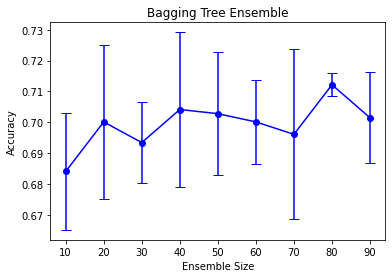

In [ ]:
plt.figure()
plt.errorbar(num_est, bg_clf_cv_mean, yerr=bg_clf_cv_std,c='blue', fmt='-o', capsize=5)
plt.ylabel('Accuracy'); plt.xlabel('Ensemble Size'); plt.title('Bagging Tree Ensemble');
plt.show()

Best Bag is 70 with accuracy 0.7041499330655957

Bagging Decision Tree will provide a better result than DT

##Comparing the models and analysing the results

DT 0.64 0.0
GNB 0.471 0.0
SVC-Bag 0.631 0.0
DT-Bag 0.667 0.0
GNB-Bag 0.427 0.0
Bst-DT 0.68 0.0
Bst-GNB 0.556 0.0
Stk-DT 0.551 0.0


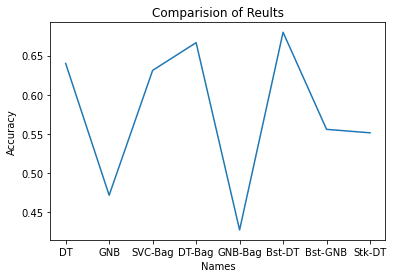

In [ ]:
def get_models():
  models = dict() 
  initial_level=list()

  initial_level.append(('lr', LogisticRegression()))
  initial_level.append(('svm', svm.SVC()))
  initial_level.append(('bayes', GaussianNB()))

  models['DT'] = tree.DecisionTreeClassifier()
  models['GNB'] = GaussianNB()
  models['SVC-Bag'] = BaggingClassifier(base_estimator=svm.SVC(), n_estimators=70)
  models['DT-Bag'] = BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(), n_estimators=70)
  models["GNB-Bag"] = BaggingClassifier(base_estimator=GaussianNB(), n_estimators=70)
  models['Bst-DT'] = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(), n_estimators=70)
  models["Bst-GNB"] = AdaBoostClassifier(base_estimator=GaussianNB(), n_estimators=70)
  models['Stk-DT'] = StackingClassifier(estimators=initial_level, final_estimator=tree.DecisionTreeClassifier())

  return models

models= get_models()

def evaluate_model(model, X, y):
  acc = []
  for j in range(100):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    acc.append(accuracy)
    scores=np.mean(acc) 
    return scores

 
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('{} {:.3} {:.3}'.format(name, mean(scores), std(scores)))
 
plt.ylabel('Accuracy'); plt.xlabel("Names"); plt.title("Comparision of Reults")
plt.plot(names,results)

#Conclusion

#**The Best Classifier is Decision Tree with Boosting approach**

#PART 2

## Importing Data And Data Preparation.

In [ ]:
df_p2 = pd.read_csv("/content/fitness analysis.csv")
cols = [0,1,2,7,9,10,13,17]
df_p2.drop(df_p2.columns[cols],axis=1,inplace=True)
colstoTransform = [0,2,3,4,5,6,8,9]
df_p2 = pd.get_dummies(df_p2, columns=df_p2.columns[colstoTransform], drop_first=True)
df_p2.head()

,How important is exercise to you ?,How healthy do you consider yourself?,Your age _19 to 25,Your age _26 to 30,Your age _30 to 40,Your age _40 and above,How do you describe your current level of fitness ?_Good,How do you describe your current level of fitness ?_Perfect,How do you describe your current level of fitness ?_Unfit,How do you describe your current level of fitness ?_Very good,...,What form(s) of exercise do you currently participate in ? (Please select all that apply)_Zumba dance,What form(s) of exercise do you currently participate in ? (Please select all that apply)_Zumba dance;Team sport,How long do you spend exercising per day ?_2 hours,How long do you spend exercising per day ?_3 hours and above,How long do you spend exercising per day ?_30 minutes,How long do you spend exercising per day ?_I don't really exercise,Would you say you eat a healthy balanced diet ?_Not always,Would you say you eat a healthy balanced diet ?_Yes,Have you ever recommended your friends to follow a fitness routine?_Yes,Have you ever purchased a fitness equipment?_Yes
0,2,3,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,1,0
1,4,4,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,1,0,1,0
2,3,4,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,1,1
3,4,4,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,3,4,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,1,0


##Getting Input and Output variables.

In [ ]:
X_p2 = df_p2.drop("How important is exercise to you ?", axis = 1)
y_p2 = df_p2["How important is exercise to you ?"]
print(y_p2.head())
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_p2, y_p2, test_size = 0.2)

0    2
1    4
2    3
3    4
4    3
Name: How important is exercise to you ?, dtype: int64


##Applying Models

In [ ]:
models1 = {}
models1["DTR"] = DecisionTreeRegressor()
models1["RR"] = RandomForestRegressor()
models1["LR"] = LinearRegression()
models1["GBR"] = GradientBoostingRegressor()

##Calculating RMSE and R-Score

In [ ]:
model_acc1 = {}
for key in models1:
  model_r1 = models1[key]
  dt_pt2 = model_r1.fit(X_train1,y_train1)
  pred_p2 = dt_pt2.predict(X_test1) 
  a1 = model_r1.score(X_test1,y_test1) 
  mse1=mean_squared_error(pred_p2,y_test1)
  rmse=sqrt(mse1)
  model_acc1[key] = a1
  print("Rmse for:{} is {:.3f}".format(model_r1,rmse))
print("R Score",model_acc1) 

Rmse for:DecisionTreeRegressor() is 1.162
Rmse for:RandomForestRegressor() is 0.942
Rmse for:LinearRegression() is 3403507663372.859
Rmse for:GradientBoostingRegressor() is 0.903
R Score {'DTR': -0.16498652660793245, 'RR': 0.234304586658296, 'LR': -9.993312017884947e+24, 'GBR': 0.2965939604155461}


##Adding 2Sigma Outlier Detection

In [ ]:
trial = df_p2
xbar = np.mean(y_p2) 
v = variance(y_p2)
s = np.std(y_p2)
L=xbar-2*s
U=xbar+2*s
df_p2.rename(columns={'How important is exercise to you ?':'target'}, inplace=True)

outliers = [] 
for i in y_p2: 
    if i > U or i<L: 
        outliers.append(i) 
print('outliers in dataset is', outliers) 
print('Number of Outlier {} vs Number of Total Entries {} percentage {:.2f}%'.format(len(outliers),len(y_p2), (len(outliers)/len(y_p2))*100))
print('Highest Cutoff is {} \nLowest Cutoff is {}'.format(U, L))

print("Mean is: {}\nVariance is: {}\nStandard Deviation is: {}".format(xbar,v,s))
print(len(trial))
trial=trial[(trial.target>= L) & (trial.target<= U)]
print(len(trial))

outliers in dataset is [1, 1, 1, 1, 1, 1, 1, 1]
Number of Outlier 8 vs Number of Total Entries 545 percentage 1.47%
Highest Cutoff is 5.878371510958111 
Lowest Cutoff is 1.8904358284914304
Mean is: 3.8844036697247706
Variance is: 0.9958041014570966
Standard Deviation is: 0.9969839206166701
545
537


##Preparing Data with no outliers

In [ ]:
X_p2_1 = trial.drop("target", axis = 1)
y_p2_1 = trial["target"]
print(y_p2_1.head())
X_train1_1, X_test1_1, y_train1_1, y_test1_1 = train_test_split(X_p2_1, y_p2_1, test_size = 0.2)

0    2
1    4
2    3
3    4
4    3
Name: target, dtype: int64


##R-Score and RMSE for data with no outliers

In [ ]:
model_acc1 = {}
for key in models1:
  model_r1 = models1[key]
  dt_pt2 = model_r1.fit(X_train1_1,y_train1_1)
  pred_p2_1 = dt_pt2.predict(X_test1_1) 
  a1 = model_r1.score(X_test1_1,y_test1_1) 
  mse1=mean_squared_error(pred_p2_1,y_test1_1)
  rmse=sqrt(mse1)
  model_acc1[key] = a1
  print("Rmse for:{} is {:.3f}".format(model_r1,rmse))
print("R Score",model_acc1) 

Rmse for:DecisionTreeRegressor() is 1.304
Rmse for:RandomForestRegressor() is 0.959
Rmse for:LinearRegression() is 0.927
Rmse for:GradientBoostingRegressor() is 0.879
R Score {'DTR': -0.7688742312149033, 'RR': 0.04449474943381404, 'LR': 0.10683549622970245, 'GBR': 0.19628917204872276}


#Conclusion


#**Here The best R-Score is for GBR and Random Forest with 0.051 and 0.025 and rmse of 0.906 and 0.918**
However it is to be noted these results prove that the model is not well fit as the R-Score is very low and hence the prediction will be with error.

#PART 3:

The Dataset is loaded from http://users.stat.ufl.edu/~winner/data/nfl2008_fga.csv

As I Use MacOs, Certificates that cannot be authorised cannot be displayed. So i have Manually downloaded the csv 

In [ ]:
df = pd.read_csv("/content/nfl2008_fga.csv")
df.head()

,GameDate,AwayTeam,HomeTeam,qtr,min,sec,kickteam,def,down,togo,...,distance,homekick,kickdiff,timerem,offscore,defscore,season,GOOD,Missed,Blocked
0,20081130,IND,CLE,1,47,2,IND,CLE,4.0,11.0,...,30,0,-3,2822,0,3,2008,1,0,0
1,20081005,IND,HOU,1,54,47,IND,HOU,4.0,3.0,...,46,0,0,3287,0,0,2008,1,0,0
2,20081228,TEN,IND,1,45,20,IND,TEN,4.0,3.0,...,28,1,7,2720,7,0,2008,1,0,0
3,20081012,BAL,IND,1,45,42,IND,BAL,4.0,1.0,...,37,1,14,2742,14,0,2008,1,0,0
4,20080907,CHI,IND,1,50,56,IND,CHI,4.0,21.0,...,39,1,0,3056,0,0,2008,1,0,0


In [ ]:
df = df.fillna(0)
df.isnull().sum().count

<bound method Series.count of GameDate    0
AwayTeam    0
HomeTeam    0
qtr         0
min         0
sec         0
kickteam    0
def         0
down        0
togo        0
kicker      0
ydline      0
name        0
distance    0
homekick    0
kickdiff    0
timerem     0
offscore    0
defscore    0
season      0
GOOD        0
Missed      0
Blocked     0
dtype: int64>

In [ ]:
X = df.drop(['qtr','GameDate','AwayTeam','HomeTeam','kickteam','def','name'], axis = 1)
y= df['qtr']

In [ ]:
y.unique()

array([1, 2, 3, 4, 5])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
df.describe()

,GameDate,qtr,min,sec,down,togo,kicker,ydline,distance,homekick,kickdiff,timerem,offscore,defscore,season,GOOD,Missed,Blocked
count,1.039000e+03,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.0,1039.000000,1039.000000,1039.000000
mean,2.008140e+07,2.497594,27.968239,26.551492,3.811357,6.725698,19.537055,18.768046,36.666025,0.494706,0.382098,1704.645813,9.949952,9.567854,2008.0,0.866218,0.133782,0.021174
std,1.702338e+03,1.108621,16.716783,18.107977,0.656248,4.162270,11.303244,10.187505,9.847836,0.500213,9.675133,1003.771275,9.434869,8.365389,0.0,0.340582,0.340582,0.144034
min,2.008090e+07,1.000000,-15.000000,0.000000,0.000000,0.000000,1.000000,1.000000,18.000000,0.000000,-41.000000,-887.000000,0.000000,0.000000,2008.0,0.000000,0.000000,0.000000
25%,2.008100e+07,2.000000,14.000000,9.500000,4.000000,4.000000,9.000000,10.000000,28.000000,0.000000,-6.000000,895.500000,0.000000,3.000000,2008.0,1.000000,0.000000,0.000000
50%,2.008111e+07,2.000000,30.000000,25.000000,4.000000,6.000000,20.000000,19.000000,37.000000,0.000000,0.000000,1808.000000,7.000000,7.000000,2008.0,1.000000,0.000000,0.000000
75%,2.008120e+07,4.000000,42.000000,43.000000,4.000000,9.000000,30.000000,26.000000,44.000000,1.000000,6.000000,2556.500000,16.000000,14.000000,2008.0,1.000000,0.000000,0.000000
max,2.009020e+07,5.000000,58.000000,59.000000,4.000000,25.000000,37.000000,86.000000,76.000000,1.000000,44.000000,3507.000000,48.000000,44.000000,2008.0,1.000000,1.000000,1.000000


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
acc = []
for i in range(1000):
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=30)
  model_dt=DecisionTreeClassifier()
  dt = model_dt.fit(X_train,y_train) 
  YPred = dt.predict(X_test)
  a = accuracy_score(y_test,YPred)
  acc.append(a)
print("Accuracy using 1000 MC run:", np.mean(acc))

Accuracy using 1000 MC run: 0.9967948717948721


In [ ]:
lda_model = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda_model.fit_transform(X, y)
lda_var_ratios = lda_model.explained_variance_ratio_

In [ ]:
def select_n_components(var_ratio, goal_var: float) -> int:
  total_variance = 0.0
    
  n_components = 0
    
  for explained_variance in var_ratio:
        
      total_variance += explained_variance
      n_components += 1
        
      if total_variance >= goal_var:
          break
  return n_components

In [ ]:
select_n_components(lda_var_ratios, 0.95)
LDA=pd.DataFrame(X_lda)
LDA.columns=['lda1']
a=lda_model.explained_variance_ratio_

In [ ]:
from sklearn.model_selection import train_test_split 
acc = []
for i in range(1000):
  X_train,X_test,y_train,y_test=train_test_split(X_lda,y,test_size=0.3,random_state=30)# split dataset
  model_dt=DecisionTreeClassifier() 
  dt = model_dt.fit(X_train,y_train)
  YPred = dt.predict(X_test)
  a = accuracy_score(y_test,YPred)
  acc.append(a)
print("Accuracy using 1000 MC run:", np.mean(acc))

Accuracy using 1000 MC run: 0.9775641025641023


## PCA

In [ ]:
pca = PCA(n_components=1)
x = pca.fit_transform(X)
PCAs=pca.components_
df=pd.DataFrame(PCAs)
df_pca=df.T
df_pca.columns=['pca1']
df_pca.head()

,pca1
0,-0.016648
1,-0.000924
2,-0.000070
3,0.000101
4,0.000372


In [ ]:
print(pca.explained_variance_)
pca.n_components_

[1007908.25197757]


1

In [ ]:
ratio_var=pca.explained_variance_/sum(pca.explained_variance_)
df_new=np.dot(X, df_pca)

In [ ]:
acc = []
for i in range(1000):
  X_train,X_test,y_train,y_test=train_test_split(df_new,y,test_size=0.2,random_state=30)
  model_dt=DecisionTreeClassifier()
  dt = model_dt.fit(X_train,y_train)
  YPred = dt.predict(X_test)
  a = accuracy_score(y_test,YPred)
  acc.append(a)
print("Accuracy using 1000 MC run:", np.mean(acc))


Accuracy using 1000 MC run: 1.0
